In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터를 읽습니다.
df = pd.read_excel('happiness_korea.xlsx')
df = df.dropna()

In [3]:
# 타겟 변수와 특성을 정의합니다.
target = 'Happiness'
features = ['Economy', 'Health', 'Safety', 'Environment', 'Education', 
            'Relation and Social participation', 'Leisure','Life Satisfaction']

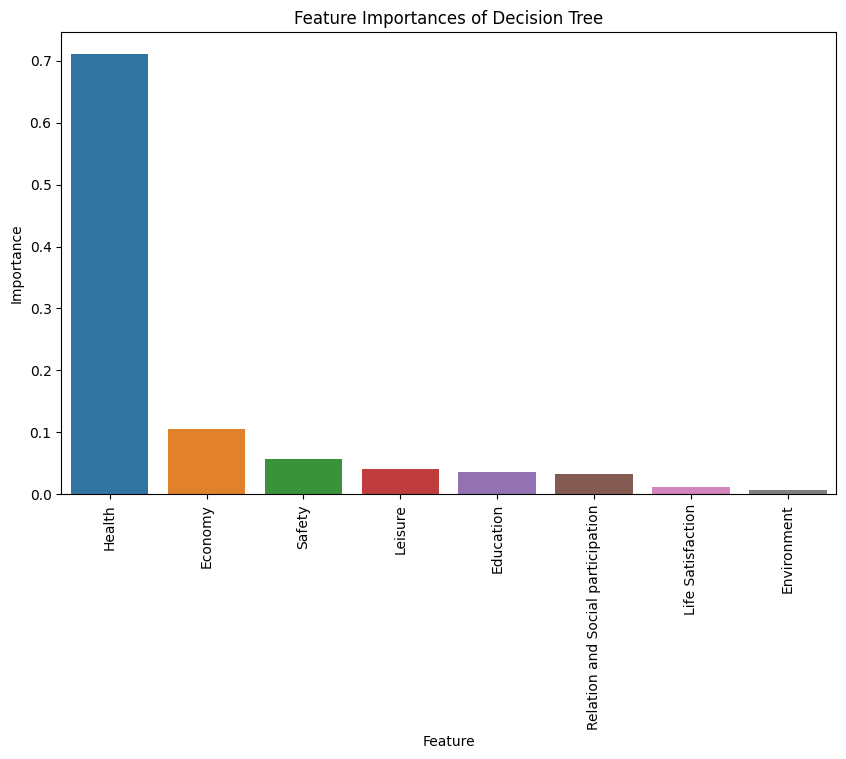

In [4]:
# 데이터를 특성과 타겟으로 분리합니다.
X = df[features]
y = df[target]

# 데이터를 훈련 세트와 테스트 세트로 분할합니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# DecisionTreeRegressor 모델을 정의하고 훈련합니다.
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# 피쳐 중요도를 가져옵니다.
importances = model.feature_importances_

# 중요도와 피쳐 이름을 DataFrame으로 변환하고, 중요도 순으로 정렬합니다.
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)

# 피쳐 중요도를 시각화합니다.
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Importance', data=feature_importances)
plt.title('Feature Importances of Decision Tree')
plt.xticks(rotation=90)  # x축 레이블이 길 경우, 레이블을 회전시킵니다.
plt.show()

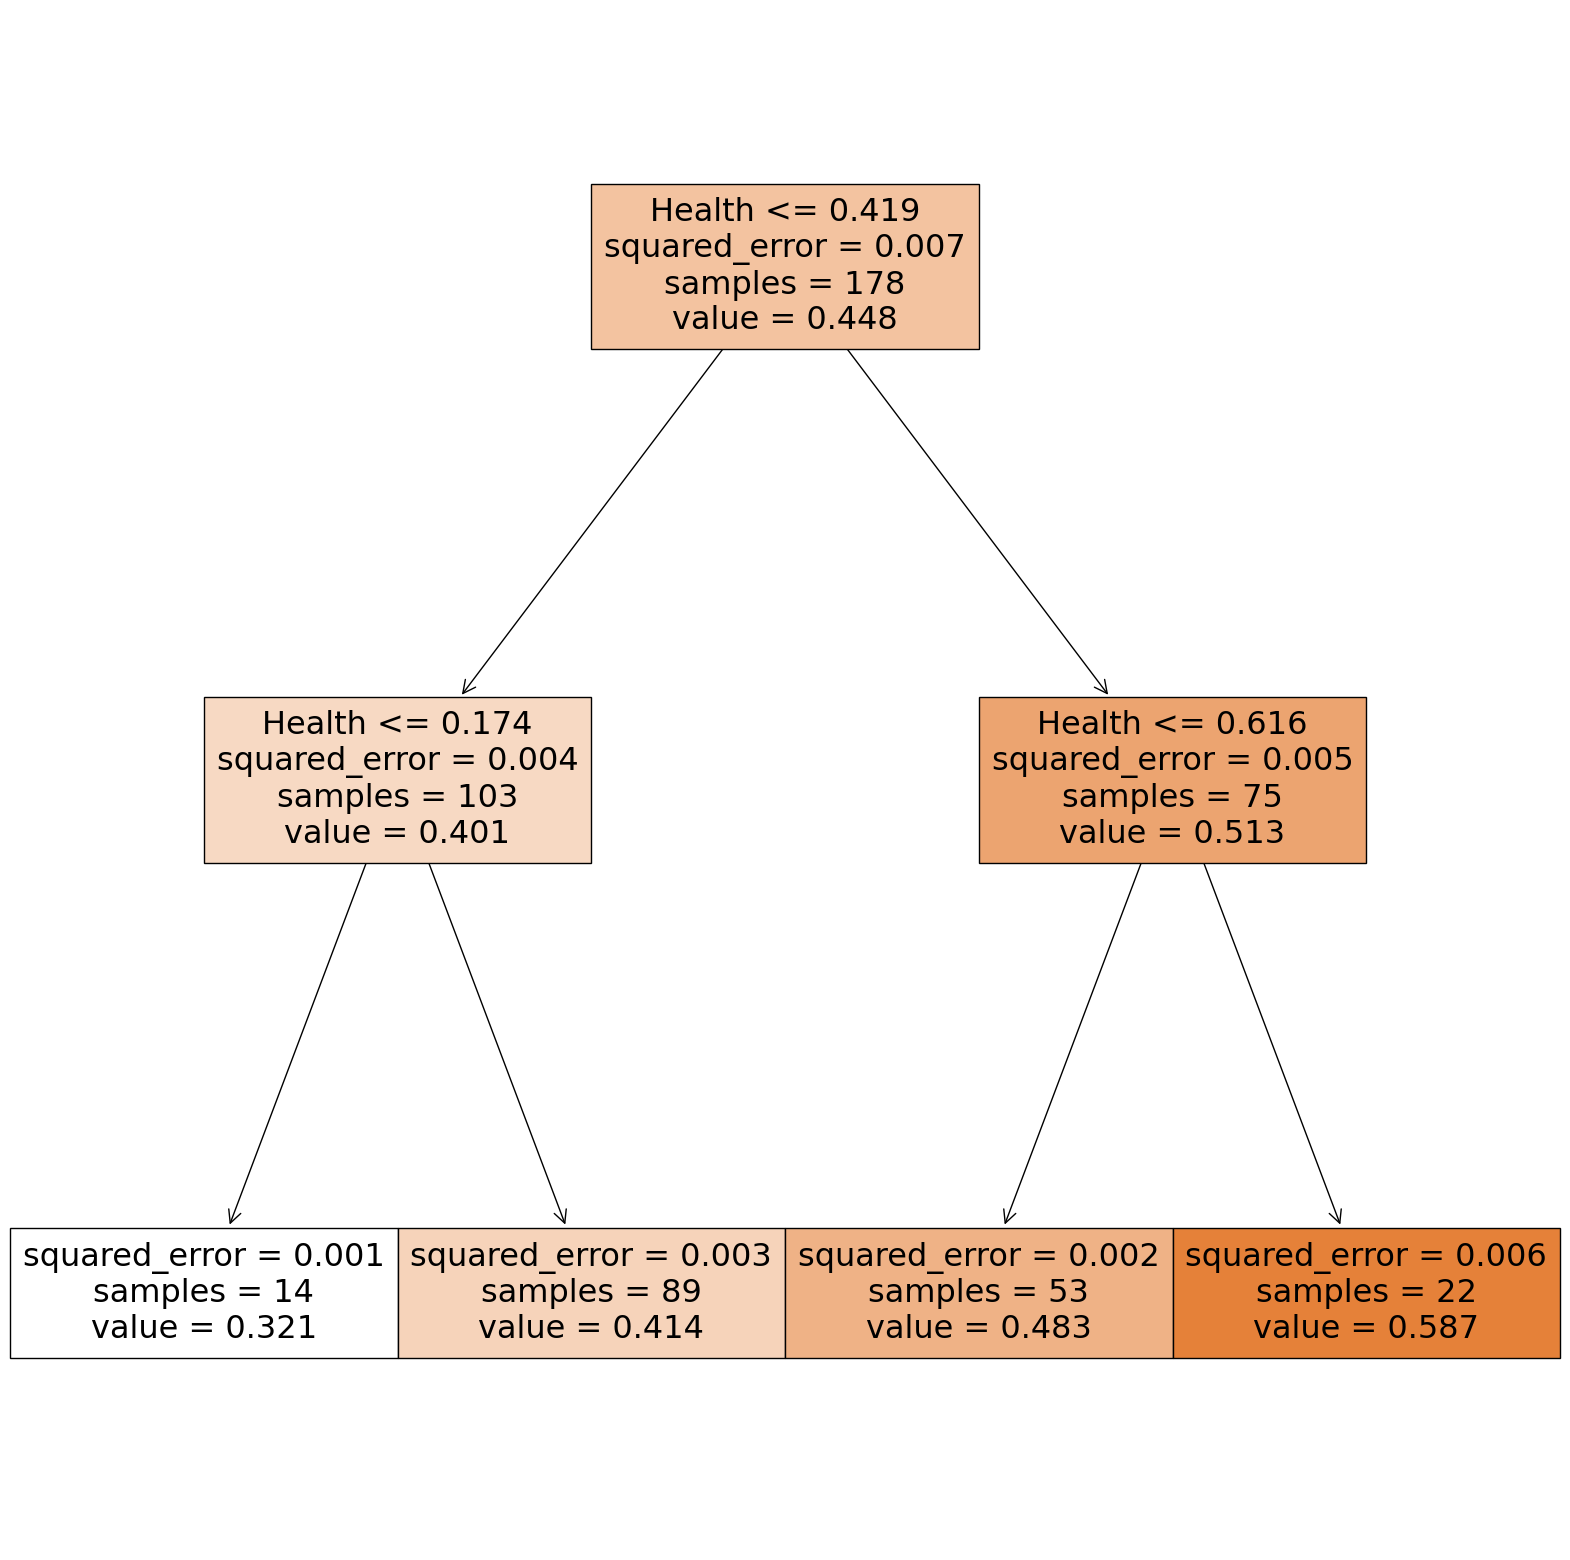

In [6]:
from sklearn import tree
import matplotlib.pyplot as plt

# DecisionTreeRegressor 모델을 정의하고 훈련합니다.
model = DecisionTreeRegressor(max_depth=2, random_state=42)
model.fit(X_train, y_train)

# 플롯의 크기를 설정합니다.
plt.figure(figsize=(20, 20))

# 결정 트리를 시각화합니다.
tree.plot_tree(model, feature_names=features, filled=True)
plt.show()

In [7]:
from sklearn.metrics import mean_squared_error
from sklearn import tree
import matplotlib.pyplot as plt

In [8]:
# 테스트 세트에 대한 예측을 생성합니다.
y_pred = model.predict(X_test)

# MSE를 계산합니다.
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

MSE: 0.0031379807116673633
